In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [2]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [3]:
import io
df1 = pd.read_csv(io.BytesIO(upload['train.csv']))
df1.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quality or Spam tweets.')

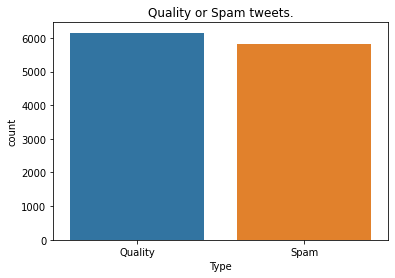

In [5]:
#Here it is found that both spam and quality tweet are same in number in the train dataset.
sns.countplot('Type', data = df1)
plt.title('Quality or Spam tweets.')

In [6]:
df1['Type'].value_counts()

Quality    6153
Spam       5815
Name: Type, dtype: int64

In [7]:
#As we could see 'Type' data has to be predicted.
X_tr = df1.drop('Type', axis=1)   #Dropping the type column and storing only other columns
y_tr = df1['Type']

In [8]:
X_tr.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K"
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga"
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg


In [9]:
#Values 0 for quality and 1 for spam mails
labelencoder = LabelEncoder()
y_tr = labelencoder.fit_transform(y_tr)
y_tr

array([0, 0, 0, ..., 1, 0, 1])

In [10]:
X_tr.reset_index(inplace=True)
X_tr

,index,Id,Tweet,following,followers,actions,is_retweet,location
0,0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago
1,1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN
2,2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K"
3,3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga"
4,4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg
...,...,...,...,...,...,...,...,...
11963,11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN
11964,11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4"
11965,11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon ãve
11966,11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila


In [11]:
X_tr.shape

(11968, 8)

In [12]:
upload1 = files.upload()

Saving test.csv to test.csv


In [13]:
#Upload the test file, where we have to predict whether the tweet is spam or quality
df2 = pd.read_csv(io.BytesIO(upload1['test.csv']))

In [14]:
df2.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi
1,1,I only learned to dream in sound #love,63.0,55,508.0,0,england
2,2,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest
4,4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502


In [15]:
df2.shape

(630, 7)

In [16]:
X_test = df2.copy()

In [17]:
X_test.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi
1,1,I only learned to dream in sound #love,63.0,55,508.0,0,england
2,2,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest
4,4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502


In [18]:
X_test.shape

(630, 7)

In [19]:
X_test.reset_index(inplace=True)

In [20]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
abc = []

Data Preprocessing


In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
abc = []
for i in range(0, len(X_tr)):
    tr = re.sub('[^a-zA-Z]', ' ', X_tr['Tweet'][i]) #Omit everything except for a-z and A-Z in 'tweet' column, with a blank.
    tr = tr.lower()       #Returns the lower case 
    tr = tr.split()       #To create list of words for stemming and stopwords
    
    tr = [ps.stem(word) for word in tr if not word in stopwords.words('english')]   #Returns the stemwords for most of the word and omit the stopwords from the english language
    tr = ' '.join(tr)    # Combining all the spaces with join function    
    abc.append(tr)      #every sentence is stored in abc

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

In [25]:
#we have to represent each word with unique number so we use one hot encoding to represent each with the number between 0-10000.
voc_size = 10000
onehot_rep = [one_hot(words, voc_size) for words in abc]

In [26]:
onehot_rep

[[35, 7680, 6880, 2521, 7121, 3019, 7615, 1955, 6069],
 [3276,
  6307,
  6974,
  9387,
  8882,
  9323,
  23,
  6773,
  8401,
  2568,
  4484,
  6795,
  5472,
  1290],
 [6928, 3442, 2818, 2729, 9653, 65, 8258],
 [3085,
  836,
  6740,
  5829,
  2574,
  9149,
  4533,
  9653,
  1441,
  3037,
  3094,
  9653,
  1441,
  4229,
  1737],
 [115, 5760, 6866, 9389, 6378, 3214, 7848, 9653, 1441, 4851, 2172, 5470, 998],
 [3516, 7589, 4524, 6327, 1998, 4029, 9653, 1441, 6928],
 [3832,
  5954,
  5694,
  6456,
  8958,
  2573,
  5351,
  198,
  9653,
  9713,
  2098,
  7615,
  5456,
  9070,
  941],
 [1473,
  4954,
  4212,
  2272,
  6337,
  1376,
  6091,
  5318,
  1940,
  5318,
  1257,
  6350,
  6688,
  5017,
  3479,
  3019,
  7615,
  4016,
  4975],
 [796,
  3840,
  2674,
  5158,
  8230,
  796,
  7850,
  2485,
  3157,
  423,
  4349,
  9653,
  7960,
  7615,
  8359,
  796,
  2674,
  5158,
  7629,
  1114,
  5723,
  3019,
  7615,
  550,
  4888,
  9252],
 [8731,
  7989,
  9225,
  191,
  2230,
  3813,
  9011,
  35

In [27]:
#We pad each 
sent_length=20
docs = pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)

In [28]:
docs

array([[   0,    0,    0, ..., 7615, 1955, 6069],
       [   0,    0,    0, ..., 6795, 5472, 1290],
       [   0,    0,    0, ..., 9653,   65, 8258],
       ...,
       [   0,    0,    0, ..., 1441, 7262, 3143],
       [   0, 9801, 3442, ..., 8324, 5476, 8811],
       [   0,    0,    0, ..., 3006, 6134, 9668]], dtype=int32)

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
xyz = []
for i in range(0, len(X_test)):
    te = re.sub('[^a-zA-Z]', ' ', X_test['Tweet'][i])
    te = te.lower()
    te = te.split()
    
    te = [ps.stem(word) for word in te if not word in stopwords.words('english')]
    te = ' '.join(te)
    xyz.append(te)

In [30]:
onehot_rep_test = [one_hot(words, voc_size) for words in xyz]

In [31]:
test_docs = pad_sequences(onehot_rep_test, padding='pre', maxlen=sent_length)

In [32]:
test_docs.shape

(630, 20)

In [33]:
docs.shape

(11968, 20)

In [34]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=20))
model.add(LSTM(embedding_vector_features, return_sequences=True))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 20, 40)            12960     
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               410112    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
 dense_2 (Dense)             (None, 1)                 9

In [35]:
import numpy as np

In [36]:
X_tr_final = np.array(docs)
y_tr_final = np.array(y_tr)

In [37]:
X_tr_final

array([[   0,    0,    0, ..., 7615, 1955, 6069],
       [   0,    0,    0, ..., 6795, 5472, 1290],
       [   0,    0,    0, ..., 9653,   65, 8258],
       ...,
       [   0,    0,    0, ..., 1441, 7262, 3143],
       [   0, 9801, 3442, ..., 8324, 5476, 8811],
       [   0,    0,    0, ..., 3006, 6134, 9668]], dtype=int32)

In [38]:
y_tr_final

array([0, 0, 0, ..., 1, 0, 1])

In [39]:
from sklearn.model_selection import train_test_split
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(X_tr_final, y_tr_final, test_size=0.25, random_state=42)

In [40]:
X_tr_1.shape

(8976, 20)

In [41]:
y_tr_1.shape

(8976,)

In [42]:
model.fit(X_tr_1, y_tr_1, validation_data=(X_test_1, y_test_1), epochs=10, batch_size=64)

Epoch 1/10
141/141 [==============================] - 9s 10ms/step - loss: 0.2950 - binary_accuracy: 0.8673 - val_loss: 0.1795 - val_binary_accuracy: 0.9278
Epoch 2/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0835 - binary_accuracy: 0.9706 - val_loss: 0.1965 - val_binary_accuracy: 0.9311
Epoch 3/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0329 - binary_accuracy: 0.9893 - val_loss: 0.2767 - val_binary_accuracy: 0.9231
Epoch 4/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0133 - binary_accuracy: 0.9960 - val_loss: 0.3396 - val_binary_accuracy: 0.9228
Epoch 5/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0063 - binary_accuracy: 0.9983 - val_loss: 0.3809 - val_binary_accuracy: 0.9248
Epoch 6/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0043 - binary_accuracy: 0.9986 - val_loss: 0.4837 - val_binary_accuracy: 0.9231
Epoch 7/10
141/141 [==============================] - 1s 7ms/st

In [62]:
y_pred = model.predict(X_test_1)

In [63]:
y_pred

array([[9.9999785e-01],
       [8.4789386e-03],
       [9.8510426e-01],
       ...,
       [1.0000000e+00],
       [1.2267001e-04],
       [1.0000000e+00]], dtype=float32)

In [64]:
#If y_pred>0.5, it is 1 or it is 0
y_pred = np.where(y_pred > 0.5, 1, 0)

In [65]:
y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [66]:

from sklearn.metrics import classification_report
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1498
           1       0.91      0.93      0.92      1494

    accuracy                           0.92      2992
   macro avg       0.92      0.92      0.92      2992
weighted avg       0.92      0.92      0.92      2992



Predicting the text from test data

In [67]:
test_docs = np.array(test_docs)
y_test = model.predict(test_docs)

In [68]:
y_test

array([[1.00000000e+00],
       [1.75089531e-06],
       [8.66413902e-05],
       [9.99995232e-01],
       [9.74748313e-01],
       [1.00000000e+00],
       [9.99997616e-01],
       [1.74378147e-05],
       [9.99893069e-01],
       [5.88943806e-07],
       [1.58952134e-05],
       [9.99999523e-01],
       [1.00000000e+00],
       [9.99963284e-01],
       [9.99999762e-01],
       [6.60180604e-06],
       [9.99996662e-01],
       [9.96453881e-01],
       [9.99935985e-01],
       [9.99999881e-01],
       [9.95607316e-01],
       [3.27051794e-06],
       [9.99284565e-01],
       [1.27995036e-05],
       [4.22082186e-01],
       [9.99991417e-01],
       [1.11116526e-06],
       [1.44216550e-08],
       [3.93253970e-07],
       [9.17035103e-01],
       [1.27068779e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.90316256e-07],
       [9.99999762e-01],
       [9.99995828e-01],
       [1.96009874e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],


In [69]:
y_test = np.where(y_test > 0.5, "spam", "quality")

In [71]:
y_test

array([['spam'],
       ['quality'],
       ['quality'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['quality'],
       ['spam'],
       ['quality'],
       ['quality'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['quality'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['quality'],
       ['spam'],
       ['quality'],
       ['quality'],
       ['spam'],
       ['quality'],
       ['quality'],
       ['quality'],
       ['spam'],
       ['quality'],
       ['spam'],
       ['spam'],
       ['quality'],
       ['spam'],
       ['spam'],
       ['quality'],
       ['spam'],
       ['spam'],
       ['spam'],
       ['quality'],
       ['quality'],
       ['quality'],
       ['spam'],
       ['quality'],
       ['quality'],
       ['quality'],
       ['quality'],
       ['quality'],
       ['quality'],
       ['spam'],
       ['quality'],
       ['quality'],
       ['quality'],
 

In [75]:
y_test = pd.DataFrame(y_test)

In [76]:
y_test

,0
0,spam
1,quality
2,quality
3,spam
4,spam
...,...
625,spam
626,spam
627,quality
628,spam
